In [1]:
import csv
import thesis_tools
import numpy as np
import pandas as pd

from scipy.stats import linregress
from itertools import chain

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import Normalize

import seaborn as sb
blue=sb.xkcd_palette(['windows blue'])[0]
amber=sb.xkcd_palette(['amber'])[0]
% matplotlib inline
plt.style.use('sm')

In [2]:
sheffer_data=pd.read_csv('sheffer_co_h2.csv')
burgh_data=pd.read_csv('burgh_data.csv')

In [3]:
with open('primary_sightlines.csv','rb') as csvfile:
    inp=csv.reader(csvfile)
    primary_sightlines=inp.next()

sl_data=thesis_tools.load_data(primary_sightlines)
all_data=thesis_tools.load_results(sl_data)

/Users/codydirks/python/thesis_tools/loaders.py:105: RuntimeWarning: divide by zero encountered in log10
  n_dict[ion]=round(np.log10(n_tot),3)
/Users/codydirks/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/codydirks/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/codydirks/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/codydirks/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/codydirks/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarni

1.86496386057


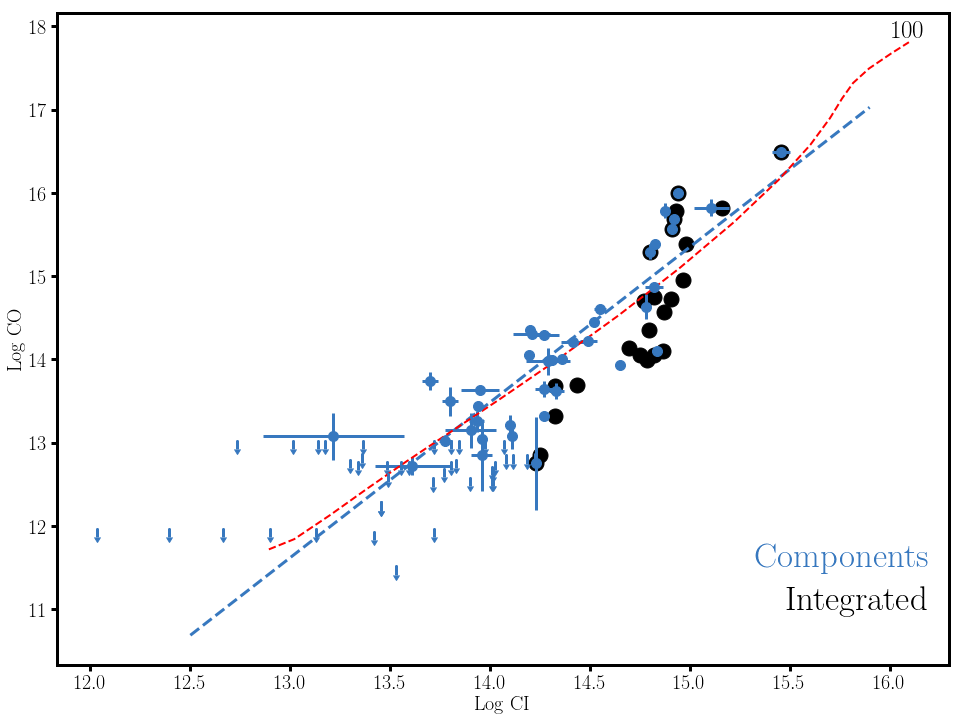

In [88]:
fig=plt.figure(1,figsize=(16,12))
subplt=plt.subplot(111)

fitx=np.empty(0)
fity=np.empty(0)
cut_data=all_data[(all_data['C']>0)]
for sl,data in cut_data.groupby('Sightline'):
    cs_to_sum=all_data[all_data['Sightline']==sl]
    cs=[np.log10(np.sum([10**row[col] for col in ('C','C*','C**')])) for idx,row in cs_to_sum.iterrows()]
    c_errs=list(chain.from_iterable([list(row) for idx,row in cs_to_sum[['C_err','C*_err','C**_err']].iterrows()]))
    c_sum=np.log10(np.sum([10**n for n in cs]))
    c_sum_err=0.434*np.sqrt(np.sum([10**(2*n) for n in c_errs]))/(10**c_sum)
    
    cos_to_sum=all_data[all_data['Sightline']==sl]
    co_sum=np.log10(np.sum([10**n for n in cos_to_sum['CO']]))
    co_sum_err=0.434*np.sqrt(np.sum([10**(2*n) for n in cos_to_sum['CO_err']]))/(10**(co_sum))
    subplt.plot(c_sum,co_sum,marker='o',color='k',markersize=15,zorder=-1)
    
    num_c_comps=len(all_data[(all_data['Sightline']==sl)&(all_data['C']>0)])
    for idx,row in data.iterrows():
        c=np.log10(np.sum([10**row[col] for col in ('C','C*','C**')]))
        c_err=0.434*np.sum([10**row[col+'_err'] for col in ('C','C*','C**')])/10**c
        if row['CO']<10:
            subplt.errorbar(c,row['CO_err'],
                            yerr=0.1, uplims=True,color=blue,marker='o',markersize=2)
        else:
            co_err=0.434*(10**(row['CO_err']-row['CO']))
            subplt.errorbar(c,row['CO'],xerr=c_err,yerr=co_err,marker='o',color=blue,markersize=10)
            fitx=np.concatenate([fitx,[c]])
            fity=np.concatenate([fity,[row['CO']]])
        #subplt.text(c, row['CO'], sl+' '+str(row['Velocity']))
        #print '\t',10**(row['CO']-c_tot)
    
fit=linregress(x=fitx,y=fity)
trendx=np.arange(12.5,16,0.1)
y1=fit.slope*trendx+fit.intercept
subplt.plot(trendx,y1,color=blue,linestyle='--',lw=3)
print fit.slope
    
#tx=np.arange(12.7,15.8,0.1)
#for rat in (0.01,0.1,1,10):
#    ty=np.array([np.log10(rat*(10**x)) for x in tx])
#    subplt.plot(tx,ty,'k--')
#    subplt.text(tx[-1],ty[-1]-0.04,str(rat),fontsize=25,ha='right',va='bottom',rotation=23)

for n,[(s1,(s1x,s1y)),(s2,(s2x,s2y))] in theor_results[1:2]:
    subplt.plot(s1y-1.8,s2y,'r--',linewidth=2)
    subplt.text(s1y[-1]-1.8,s2y[-1],str(n),fontsize=25,ha='center',va='bottom')


subplt.set_ylabel('Log CO',fontsize=20)
subplt.set_xlabel('Log CI',fontsize=20)
subplt.tick_params(axis='both', which='major', labelsize=20)

#subplt.set_xlim(12.7,15.9)
#subplt.set_ylim(10.5,18)
subplt.text(16.2,11.5,'Components',color=blue,fontsize=35,horizontalalignment='right')
subplt.text(16.2,11,'Integrated',color='k',fontsize=35,horizontalalignment='right')

plt.savefig('/Users/codydirks/Desktop/components_vs_integrated.pdf')

Text(16.1,11.5,u'\\textbf{Mine}')

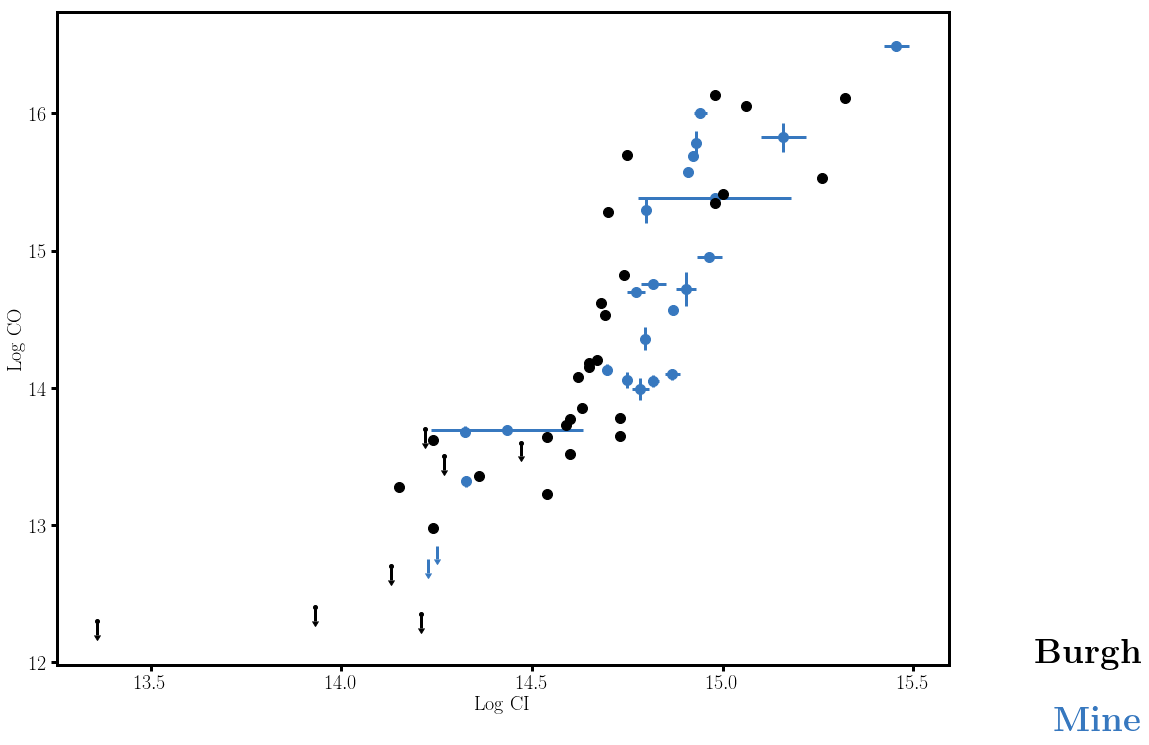

In [89]:
fig=plt.figure(1,figsize=(16,12))
subplt=plt.subplot(111)

cut_data=all_data[(all_data['C']>0)]
for sl,data in cut_data.groupby('Sightline'):
    cs_to_sum=all_data[all_data['Sightline']==sl]
    cs=[np.log10(np.sum([10**row[col] for col in ('C','C*','C**')])) for idx,row in cs_to_sum.iterrows()]
    c_errs=list(chain.from_iterable([list(row) for idx,row in cs_to_sum[['C_err','C*_err','C**_err']].iterrows()]))
    c_sum=np.log10(np.sum([10**n for n in cs]))
    c_sum_err=0.434*np.sqrt(np.sum([10**(2*n) for n in c_errs]))/(10**c_sum)
    if c_sum_err>1:
        c_sum_err=0.2
    
    cos_to_sum=all_data[all_data['Sightline']==sl]
    co_sum=np.log10(np.sum([10**n for n in cos_to_sum['CO']]))
    f=2*(np.sum([10**x for x in cos_to_sum['H_2']]))/(np.sum([10**x for x in cos_to_sum['H_tot']]))
    co_sum_err=0.434*np.sqrt(np.sum([10**(2*n) for n in cos_to_sum['CO_err']]))/(10**(co_sum))
    if co_sum_err>0.2:
        subplt.errorbar(c_sum,co_sum,yerr=0.1,uplims=True,color=blue,markersize=15,zorder=-1)
    else:
        subplt.errorbar(c_sum,co_sum,xerr=c_sum_err,yerr=co_sum_err,marker='o',color=blue,markersize=10,zorder=-1)
    

for idx,row in burgh_data.iterrows():
    #if row['Sightline'] not in all_data['Sightline'].unique():
    # TODO: Add in upper limits
    if row['CO'].startswith('<'):
        co=float(row['CO'][1:])
        cI=float(row['CI'])
        subplt.errorbar(cI,co,yerr=0.1, uplims=True,color='k',marker='o',markersize=4)
    else:
        subplt.plot(float(row['CI']),float(row['CO']),marker='o',color='k',markersize=10)

    
tx=np.arange(13.1,16.1,0.1)
#for rat in (0.01,0.1,1,10):
#    ty=np.array([np.log10(rat*(10**x)) for x in tx])
#    subplt.plot(tx,ty,'k--')
#    subplt.text(tx[-1],ty[-1]-0.04,str(rat),fontsize=25,ha='right',va='bottom',rotation=23)

for n,[(s1,(s1x,s1y)),(s2,(s2x,s2y))] in theor_results[0:3]:
    pass#subplt.plot(s1y-1.8,s2y,'r--')
    #subplt.text(s1y[-1]-1.8,s2y[-1],str(n),fontsize=25,ha='center',va='bottom')

subplt.set_ylabel('Log CO',fontsize=20)
subplt.set_xlabel('Log CI',fontsize=20)
subplt.tick_params(axis='both', which='major', labelsize=20)

subplt.text(16.1,12,'\\textbf{Burgh}',color='k',fontsize=35,ha='right')
subplt.text(16.1,11.5,'\\textbf{Mine}',color=blue,fontsize=35,ha='right')


#plt.savefig('/Users/codydirks/Desktop/burgh_vs_mine.pdf')

In [ ]:
# 12CO/13CO Plots
# Filter results 
nco_min=12
nco_max=17
ncl_min=11 # Below this, Balashev conversion to H2 becomes extremely uncertain
#cut=all_data.loc[(all_data['Cl_I']>ncl_min) & (all_data['13CO']>12)]
cut=all_data.loc[(all_data['12CO/13CO']>0)&(all_data['12CO/13CO']<100)&(all_data['13CO']>13)]

# Sightline | CO | 13CO
sheffer_isotope_data=[('HD22951', 1.83e14,2.31e12),
('HD23180', 6.78e14,9.32e12),
('HD23478', 8.05e14,12.0e12),
('HD24398', 17.9e14,16.5e12),
('HD24534', 158e14,186.0e12),
('HD27778', 123e14,183.0e12),
('HD99872', 4.54e14,5.6e12),
('HD147683', 80.3e14,113e12),
('HD148937', 3.81e14,6.6e12),
('HD177989', 4.4e14,8.35e12),
('HD192035', 13.9e14,27.5e12),
('HD198781', 16.6e14,27.7e12),
('HD203374A', 25.5e14,33.3e12),
('HD203532', 45.6e14,111e12),
('HD206267A', 134e14,322e12),
('HD207198', 31.6e14,66.1e12),
('HD207308', 83.2e14,118e12),
('HD207538', 23.4e14,45.6e12),
('HD208266', 116e14,138e12),
('HD210839', 27.5e14,35.4e12)]


fig=plt.figure(1,figsize=(16,12))
subplt=plt.subplot(111)
cm = plt.cm.get_cmap('viridis')
subplt.scatter(cut['CO'],cut['13CO'],marker='o',color=blue,s=100)

x2=[]
y2=[]
for entry in sheffer_isotope_data:
    if entry[0] not in cut['Sightline'].values:
        x2.append(np.log10(entry[1]))
        y2.append(np.log10(entry[2]))
subplt.scatter(x2,y2,marker='o',color=amber,s=100)

tx=np.arange(14,17,0.5)
ty=np.array([np.log10((10**x)/70) for x in tx])
subplt.plot(tx,ty,'k--')

In [ ]:
fig=plt.figure(1,figsize=(16,12))

subplt=plt.subplot(111)

cut_data=all_data[(all_data['C']>0) & (all_data['CO']>12) & (all_data['Cl']>0)]
for sl,data in cut_data.groupby('Sightline'):
    for idx,row in data.iterrows():
        c=np.log10(np.sum([10**row[col] for col in ('C','C*','C**')]))
        #if row['CO_err']/row['CO']>1:
        #    subplt.errorbar(10**(row['CO']-row['H_2']),10**(row['CO']-c),
        #                    yerr=0.1, uplims=True,color=blue,marker='o',markersize=4)
        #else:
        #    subplt.plot(10**(row['CO']-row['H_2']),10**(row['CO']-c),
        #                marker='o',color=blue,markersize=30*(row['f_H2'])+5,alpha=0.9)
            
    to_sum=all_data[all_data['Sightline']==sl]
    cs=[np.log10(np.sum([10**row[col] for col in ('C','C*','C**')])) for idx,row in to_sum.iterrows()]
    c_tot=np.log10(np.sum([10**n for n in cs]))
    
    co_tot=np.log10(np.sum([10**n for n in to_sum['CO']]))
    
    h2_tot=np.log10(np.sum([10**n for n in to_sum['H_2']]))
    f=2*10**(h2_tot)/np.sum([10**n for n in to_sum['H_tot']])
    print sl, f
    subplt.plot(10**(co_tot-h2_tot),10**(co_tot-c_tot),marker='o',color=blue,markersize=30*f+5)

    
for idx,row in burgh_data.iterrows():
    h2=float(row['H2'])
    c=float(row['CI'])
    f=float(row['f'])
    if row['CO'].startswith('<'):
        co=float(row['CO'][1:])
        subplt.errorbar(10**(co-h2),10**(co-c),yerr=0.1*(10**(co-c)),xerr=0.1*(10**(co-h2)),
                        xuplims=True,uplims=True,color=amber)
    else:
        co=float(row['CO'])
        subplt.plot(10**(co-h2),10**(co-c),marker='o',color=amber,markersize=30*f+5,alpha=0.9)

subplt.set_yscale('log')
subplt.set_xscale('log')
subplt.set_ylim(0.007,100)
subplt.set_xlim(1e-8,1e-4)
subplt.axvline(1e-6,0,1,color='k',linestyle='--')
subplt.axhline(1.0,0,1,color='k',linestyle='--')

subplt.text(0.02,0.86,'\\textbf{Burgh}',transform=subplt.transAxes,color=amber,fontsize=40,ha='left')
subplt.text(0.02,0.92,'\\textbf{Mine}',transform=subplt.transAxes,color=blue,fontsize=40,ha='left')

subplt.text(0.92,0.27,'\underline{f$_{H_2}$}',transform=subplt.transAxes,fontsize=50,ha='center',va='center')
subplt.plot(0.96,0.05,marker='o',color='k',markersize=30*0.1+5,alpha=0.9,transform=subplt.transAxes)
subplt.plot(0.96,0.12,marker='o',color='k',markersize=30*0.5+5,alpha=0.9,transform=subplt.transAxes)
subplt.plot(0.96,0.19,marker='o',color='k',markersize=30*1.0+5,alpha=0.9,transform=subplt.transAxes)
subplt.text(0.92,0.045,'0.1',transform=subplt.transAxes,color='k',fontsize=40,ha='right',va='center')
subplt.text(0.92,0.115,'0.5',transform=subplt.transAxes,color='k',fontsize=40,ha='right',va='center')
subplt.text(0.92,0.185,'1.0',transform=subplt.transAxes,color='k',fontsize=40,ha='right',va='center')

subplt.set_xlabel('CO/H$_2$',fontsize=25)
subplt.set_ylabel('CO/C',fontsize=25)
subplt.tick_params(axis='both', which='major', labelsize=20)


#plt.savefig('/Users/codydirks/Desktop/co_c_h2_ratios_integrated.pdf')

In [ ]:
fig,(subplt1,subplt2)=plt.subplots(ncols=2,sharex=True,figsize=(16,8))

cut_data=all_data[(all_data['C']>0) & (all_data['CO']>12) & (all_data['Cl']>0)]
for sl,data in cut_data.groupby('Sightline'):
    for idx,row in data.iterrows():
        c=np.log10(np.sum([10**row[col] for col in ('C','C*','C**')]))
        if row['CO_err']/row['CO']>1:
            subplt.errorbar(10**(row['CO']-row['H_2']),10**(row['CO']-c),
                            yerr=0.1, uplims=True,color=blue,marker='o',markersize=4)
        else:
            subplt.plot(10**(row['CO']-row['H_2']),10**(row['CO']-c),
                        marker='o',color=blue,markersize=30*(row['f_H2'])+5,alpha=0.9)
            
    to_sum=all_data[all_data['Sightline']==sl]
    cs=[np.log10(np.sum([10**row[col] for col in ('C','C*','C**')])) for idx,row in to_sum.iterrows()]
    c_tot=np.log10(np.sum([10**n for n in cs]))
    co_tot=np.log10(np.sum([10**n for n in to_sum['CO']]))
    h2_tot=np.log10(np.sum([10**n for n in to_sum['H_2']]))
    f=2*10**(h2_tot)/np.sum([10**n for n in to_sum['H_tot']])
    
    subplt1.plot(f,10**(co_tot-h2_tot),'ko',marker='o',color=blue,markersize=10)
    subplt2.plot(f,10**(co_tot-c_tot),'ko',marker='o',color=blue,markersize=10)

    
for idx,row in burgh_data.iterrows():
    h2=float(row['H2'])
    c=float(row['CI'])
    f=float(row['f'])
    if row['CO'].startswith('<'):
        co=float(row['CO'][1:])
        subplt1.errorbar(f,10**(co-h2),yerr=0.15*(10**(co-h2)),xerr=row['f_err'],
                        uplims=True,color=amber,marker='o',markersize=2)
        subplt2.errorbar(f,10**(co-c),yerr=0.15*(10**(co-c)),
                        uplims=True,color=amber,marker='o',markersize=2)
    else:
        co=float(row['CO'])
        subplt1.errorbar(f,10**(co-h2),xerr=row['f_err'],marker='o',color=amber,markersize=10,alpha=0.9)
        subplt2.errorbar(f,10**(co-c),xerr=row['f_err'],marker='o',color=amber,markersize=10,alpha=0.9)

        
subplt1.axvline(0.4,linestyle='--',lw=1)
subplt2.axvline(0.4,linestyle='--',lw=1)
subplt1.axhline(1e-6,linestyle='--',lw=1)
subplt2.axhline(1,linestyle='--',lw=1)
subplt1.set_yscale('log')
subplt2.set_yscale('log')
subplt1.set_xlim(0,1)
subplt1.set_ylim(1e-8,1e-4)
subplt2.set_ylim(0.01,100)
subplt1.set_ylabel('CO/H$_2$')
subplt2.set_ylabel('CO/CI')
subplt1.set_xlabel('Molecular Fraction')
subplt2.set_xlabel('Molecular Fraction')

0.139993648859
0.225970027079
0.222363915756
0.151318749349
0.184462910376
0.288731993803
0.410095794812
0.185360274013
0.300614140095
0.226007699474
0.162451712993
0.255144736122
0.190122961254
0.232184266142
Mine: 2.94
Burgh: 1.8


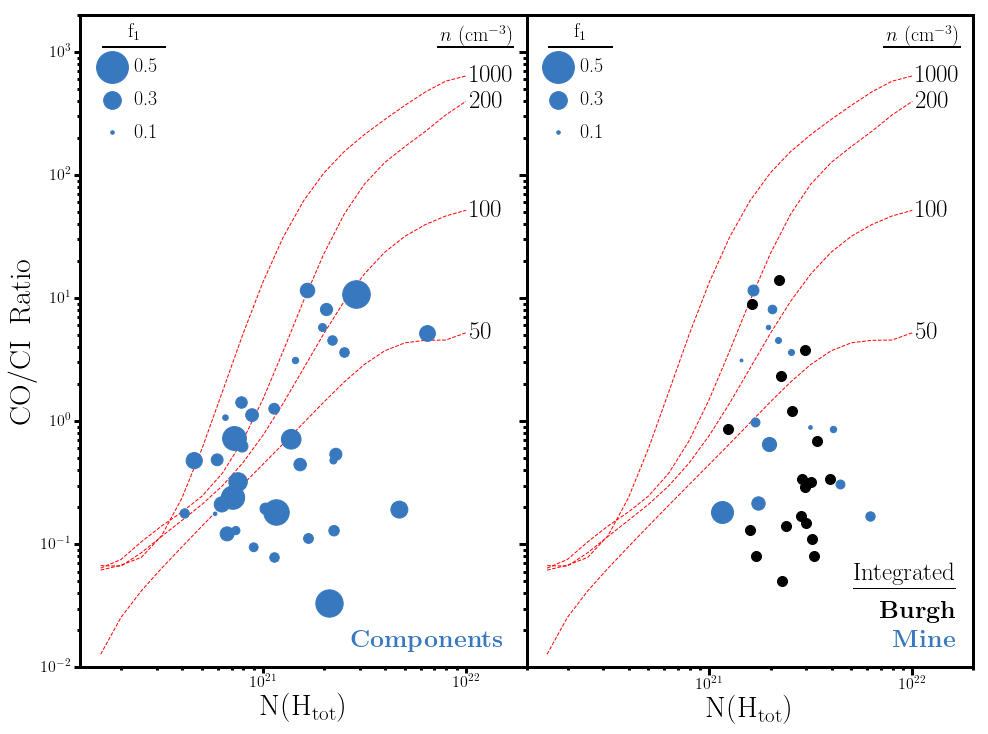

In [199]:
fig=plt.figure(1,figsize=(16,12))
subplt1=plt.subplot(121)
subplt2=plt.subplot(122)

cut_data=all_data[(all_data['C']>0) & (all_data['CO']>0)&(all_data['O']>16)]

avg=[]
for sl,data in cut_data.groupby('Sightline'):
    cs=data[['C','C*','C**']]
    c=np.log10(np.sum(10**data[['C']].values))
    c1=np.log10(np.sum(10**data[['C*']].values))
    c2=np.log10(np.sum(10**data[['C**']].values))
    c_tot=np.log10(np.sum(10**data[['C','C*','C**']].values))
    co_tot=np.log10(np.sum([10**n for n in data['CO']]))
    h2_tot=np.log10(np.sum([10**n for n in data['H_2']]))
    h_tot=np.log10(np.sum([10**n for n in data['H_tot']]))
    
    cs=np.log10((10**data[['C','C*','C**']]).sum(axis=1))
    x=10**data['H_tot']
    y=10**(data['CO']-cs)
    f1s=10**(data['C*']-np.log10((10**data[['C','C*','C**']]).sum(axis=1)))
    subplt1.scatter(x,y,marker='o',color=blue,
                    s=5000*(f1s-0.05)**2,zorder=1)
    if 14.5 < c_tot < 15.:
        subplt2.plot(10**h_tot,10**(co_tot-c_tot),marker='o',color=blue,markersize=np.sqrt(5000)*(10**(c1-c_tot)-0.1),zorder=2)
        print 10**(c1-c_tot)
        avg.append(10**(co_tot-c_tot))
    
print 'Mine:',round(np.mean(avg),2)
avg=[]
for idx,row in burgh_data.iterrows():
    x=np.log10(10**float(row['HI'])+2*10**float(row['H2']))
    if row['CO/CI'].startswith('<'):
        uplims=True
        y=float(row['CO/CI'][1:])
        yerr=0.1*y
        size=1
    else:
        y=float(row['CO/CI'])
        yerr=0#float(row['Err'])
        uplims=False
        size=10
    if 14.5<float(row['CI'])<15.:
        subplt2.errorbar(10**x,y,yerr=yerr, uplims=uplims,color='k',marker='o',markersize=size,zorder=-1)
        avg.append(y)
print 'Burgh:',round(np.mean(avg),2)
    
subplt1.set_ylabel('CO/CI$\;\;$Ratio',fontsize=30)
for subplt in (subplt1,subplt2):
    subplt.set_xlabel('N(H$_{\mathrm{tot}}$)',fontsize=30)
    subplt.set_yscale('log')
    subplt.set_xscale('log')
    subplt.set_ylim(0.01,2000)
    subplt.set_xlim(10**20.1,10**22.3)
    subplt.text(0.97,0.96,'$n$ (cm$^{-3}$)',fontsize=20,transform=subplt.transAxes,ha='right')
    subplt.axhline(1100,0.8,0.97,linewidth=2)
    
    subplt.text(0.12,0.96,'f$_1$',fontsize=20,transform=subplt.transAxes,ha='center')
    subplt.axhline(1100,0.05,0.19,linewidth=2)
    for i,f1 in enumerate([0.1,0.3,0.5]):
        subplt.plot(0.07,0.82+0.05*i,transform=subplt.transAxes,marker='o',color=blue,markersize=np.sqrt(5000.)*(f1-0.05))
        subplt.text(0.12,0.82+0.05*i,str(f1),transform=subplt.transAxes,fontsize=20,va='center')

plt.subplots_adjust(wspace=0)
subplt2.set_yticklabels([])
subplt2.tick_params('y',which='major',length=8)
subplt2.tick_params('x',which='major',length=8)
subplt2.tick_params('y',which='minor',length=4)


for n,[(s1,(s1x,s1y)),(s2,(s2x,s2y))] in theor_results:
    for subplt in (subplt1,subplt2):
        subplt.plot(10**s1x,10**(s2y-(s1y-1.8)),'r--',zorder=-1,linewidth=1)
        subplt.text(10**(s1x[-1]+0.02),10**(s2y[-1]-(s1y[-1]-1.8)),str(n),fontsize=25,ha='left',va='center')

        
subplt1.text(0.95,0.03,'\\textbf{Components}',fontsize=25,transform=subplt1.transAxes,ha='right',color=blue)

subplt2.text(0.96,0.12,'\underline{Integrated}',fontsize=25,transform=subplt2.transAxes,ha='right')
subplt2.text(0.96,0.075,'\\textbf{Burgh}',fontsize=25,transform=subplt2.transAxes,ha='right')
subplt2.text(0.96,0.03,'\\textbf{Mine}',fontsize=25,transform=subplt2.transAxes,ha='right',color=blue)


#plt.savefig('/Users/codydirks/Desktop/plots/co_c_ratio_vs_h.pdf')

In [71]:
# This cell extracts the curves from the plots of Gong et al. (2017)
# for abundances of species as a function of N(Htot)

from skimage import io, img_as_float, color,exposure
from scipy import stats
files=[50,100,200,1000]

# Colours of interest
# Each tuple is a color to be isolated in the Gong plots,
# with the form (color_id, CIE color, RGB color identifier)
cols = [('C',np.array([54.29,80.81,69.89]),'r'),
        ('CO',np.array([45.90,71.61,-46.57]),'m')]

theor_results=[]
for fl in files:
    img=io.imread('{:}.png'.format(fl))

    img = img_as_float(img[:,:,0:3])

    # Put image into LAB colour space
    image_lab = color.rgb2lab(img)
    img = exposure.rescale_intensity(img)    
    # Loop through the color array and pick out the colored features
    # Compute distance between the color of interest and the actual image
    # http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.deltaE_cmc
    # "The usual values are kL=2, kC=1 for “acceptability”"
    num_y_pix,num_x_pix=img.shape[0:2]


    fit_results=[]
    for species,cie_col,rgb_col in cols:
        distance_color = color.deltaE_ciede2000(cie_col, image_lab, kL=2, kC=1, kH=0.5)    

        # Normalise distance
        distance_color = exposure.rescale_intensity(distance_color)

        # Mask image
        image_filtered = img.copy()
        image_filtered[distance_color > 0.1] = 1
        y,x=np.where(image_filtered[:,:,0] != 1)
        y=(-9./num_y_pix)*y+19.
        x=(2./num_x_pix)*x+20.

        #f, (ax0,ax1)=plt.subplots(1,2)
        # Plot it up
        #ax0.imshow(img,aspect='auto',extent=[20,22,10,19])
        #ax1.imshow(distance_color, cmap='gray')
        #ax1.imshow(image_filtered,aspect='auto',extent=[20,22,10,19])
        #ax1.scatter(x,y,marker='o',color=rgb_col,s=.1)
        
        points=zip(x,y)
        fitx=np.empty(0)
        fity=np.empty(0)
        for val in np.arange(20.2,22,0.1):
            ys=[round(i[1],1) for i in points if round(i[0],1)==round(val,1)]
            mod=stats.mode(ys)[0][0]
            fitx=np.concatenate([fitx,[round(val,1)]])
            fity=np.concatenate([fity,[mod]])
            #ax1.plot(val,mod,'ko',markersize=10)
        cheb=np.polynomial.chebyshev.chebfit(fitx,fity,7)
        cheby=np.polynomial.chebyshev.chebval(fitx,cheb)
        fit_results.append((species,(fitx,cheby)))
        #ax1.plot(fitx,cheby,'k-',linewidth=1)
    theor_results.append((fl,fit_results))
        